In [3]:
from fastai.vision.all import *



In [6]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    splitter=RandomSplitter(valid_pct=0.2, seed=420),
    item_tfms=[Resize(224, method='squish')],
    # Specify path to subfolders containing images
    get_items=get_image_files,
    # Use parent folder name as label
    get_y=parent_label
).dataloaders('data/atleast_10k', bs=32)  # Adjusted path concatenation here

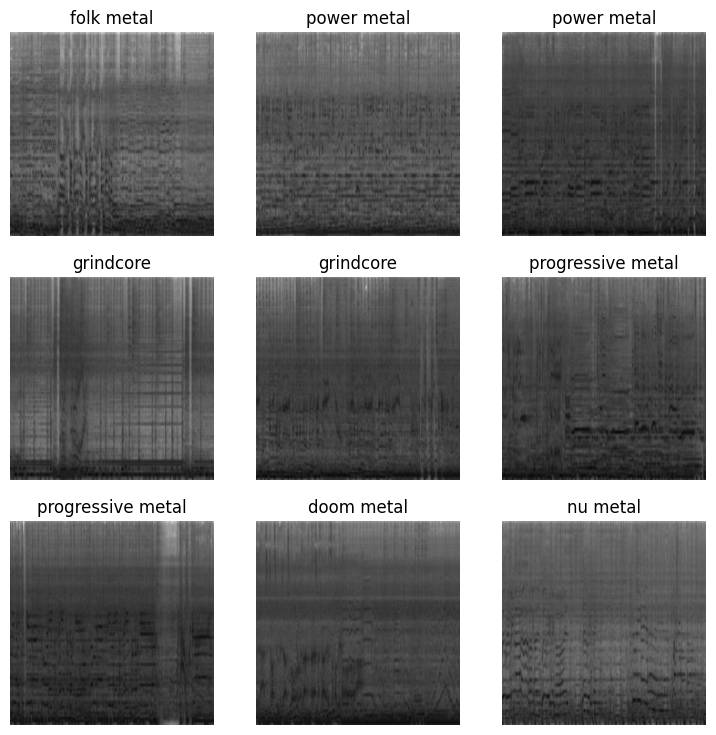

In [5]:
dls.show_batch(max_n=9)

# Full over 10k dataset
All categories reduced to exactly 10K

In [7]:
torch.cuda.empty_cache()
# train the model on (data, model, metrics)
learn = vision_learner(dls, resnet34, metrics=error_rate)
# how to fit the pre-trained model (nr epochs)
learn.fine_tune(3)
# fine_tune for pretrained model, fit for new model

epoch,train_loss,valid_loss,error_rate,time
0,2.055656,1.905918,0.640125,59:09


epoch,train_loss,valid_loss,error_rate,time
0,1.676183,1.612724,0.531083,1:05:58
1,1.482777,1.459943,0.483625,53:45
2,1.213698,1.414744,0.459417,19:39


In [8]:
learn.export('export.pkl')

In [11]:
learn.save_model('model.pth')

AttributeError: 'Sequential' object has no attribute 'save_model'

SuggestedLRs(valley=4.365158383734524e-05)

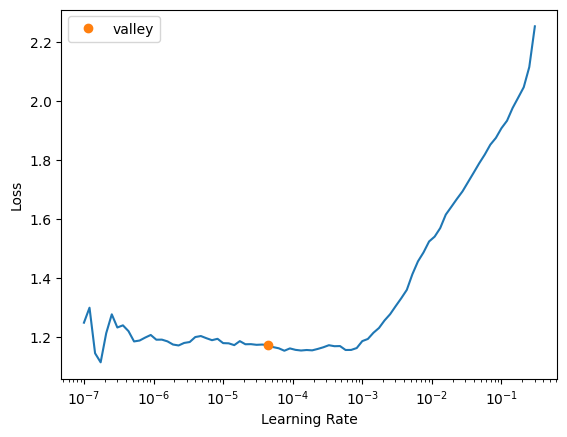

In [9]:
rate = learn.lr_find()
rate

In [10]:
learn.fine_tune(1, base_lr=rate.valley)

epoch,train_loss,valid_loss,error_rate,time
0,1.121138,1.431167,0.459833,21:11


epoch,train_loss,valid_loss,error_rate,time
0,1.086370,1.448475,0.461083,42:05


In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

NameError: name 'learn' is not defined

In [15]:
learn.save('atleast_10k_model')

Path('models/atleast_10k_model.pth')

In [1]:
learn.export('atleast_10k_model.pkl')

NameError: name 'learn' is not defined

# over 10k 1k downsample
All songs that have > 10K samples but only 1k of each used

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(224, method='squish')],
    # Specify path to subfolders containing images
    get_items=get_image_files,
    # Use parent folder name as label
    get_y=parent_label
).dataloaders('data/downsampling1000_for_10K', bs=32)  # Adjusted path concatenation here

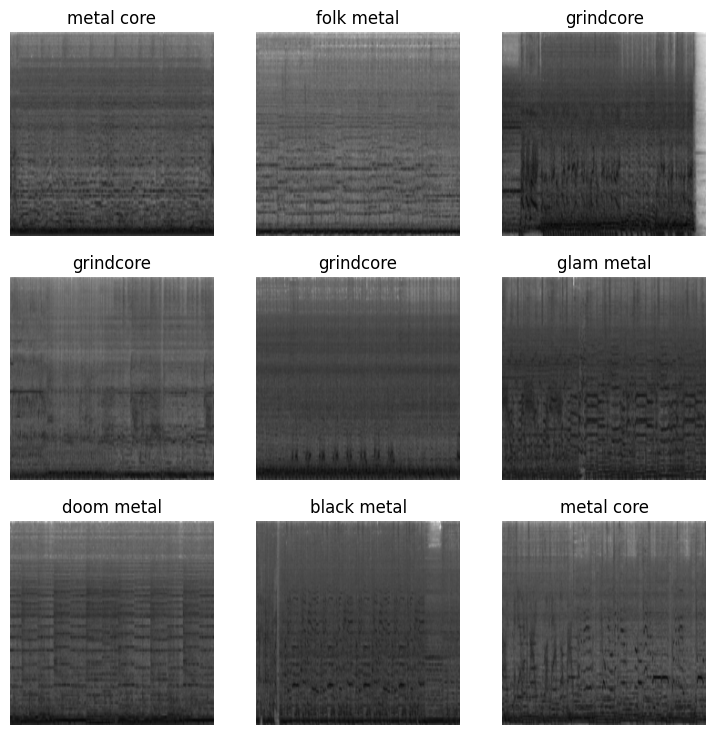

In [11]:
dls.show_batch()

In [12]:
torch.cuda.empty_cache()
# train the model on (data, model, metrics)
learn = vision_learner(dls, resnet34, metrics=error_rate)
# how to fit the pre-trained model (nr epochs)
learn.fine_tune(5)
# fine_tune for pretrained model, fit for new model

epoch,train_loss,valid_loss,error_rate,time
0,2.888493,2.340090,0.754167,02:46


epoch,train_loss,valid_loss,error_rate,time
0,2.312641,2.093683,0.689583,05:59
1,2.018550,1.951581,0.655000,07:54
2,1.545287,1.964062,0.625833,07:48
3,0.785961,2.173897,0.635000,07:51
4,0.308782,2.250350,0.640000,07:53


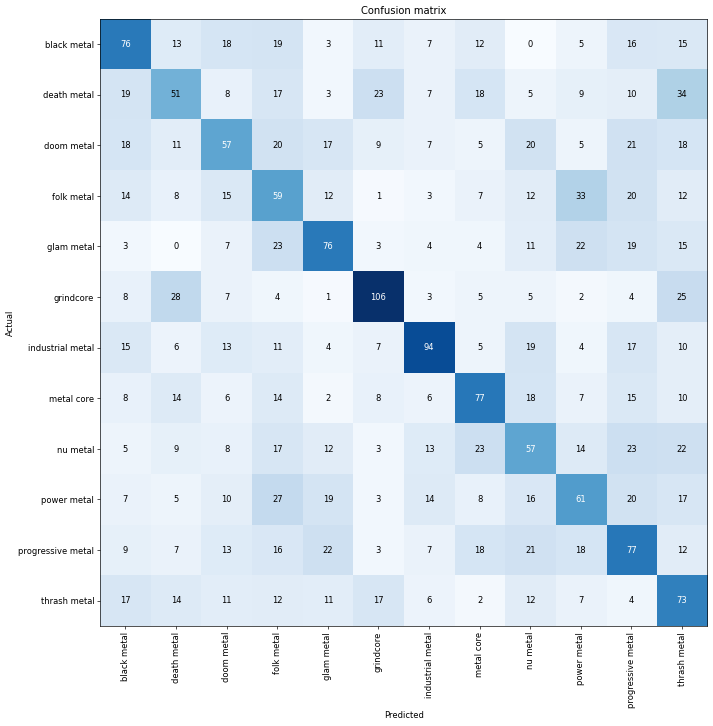

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

Resnet18 performs worse than 34

In [5]:
torch.cuda.empty_cache()
# train the model on (data, model, metrics)
learn = vision_learner(dls, resnet18, metrics=error_rate)
# how to fit the pre-trained model (nr epochs)
learn.fine_tune(5)
# fine_tune for pretrained model, fit for new model

epoch,train_loss,valid_loss,error_rate,time
0,2.889373,2.385941,0.755417,04:13


epoch,train_loss,valid_loss,error_rate,time
0,2.238075,2.120861,0.696250,05:14
1,2.017195,1.974579,0.647083,05:42
2,1.525886,2.052512,0.642500,05:43
3,0.739831,2.263447,0.655417,04:59
4,0.355578,2.311456,0.651667,05:03


In [6]:
torch.cuda.empty_cache()
# train the model on (data, model, metrics)
learn = vision_learner(dls, resnet101, metrics=error_rate)
# how to fit the pre-trained model (nr epochs)
learn.fine_tune(1)
# fine_tune for pretrained model, fit for new model

epoch,train_loss,valid_loss,error_rate,time
0,2.991194,2.499573,0.807500,10:43


epoch,train_loss,valid_loss,error_rate,time
0,2.318196,2.144375,0.719583,15:38


SuggestedLRs(valley=9.999999747378752e-06)

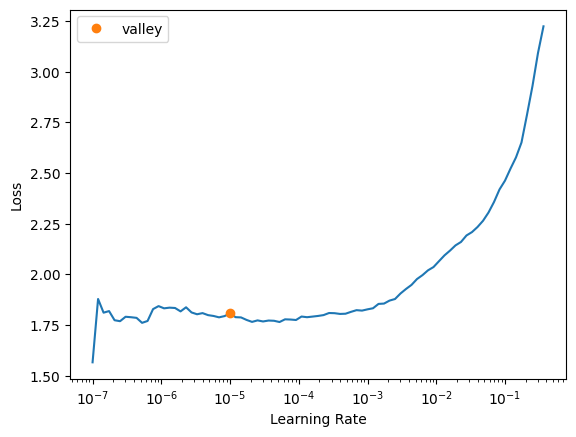

In [7]:
rate = learn.lr_find()
rate

In [10]:
learn.fine_tune(1, base_lr=9.999999747378752e-06)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.846696,2.131831,0.717083,14:11


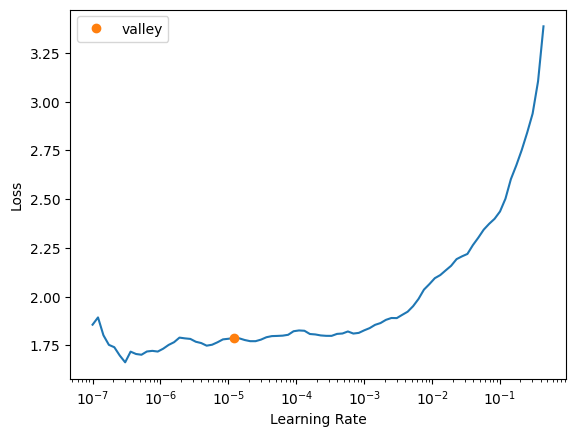

In [11]:
rate = learn.lr_find()

In [12]:
learn.fine_tune(1, base_lr=rate.valley)

epoch,train_loss,valid_loss,error_rate,time
0,1.812292,2.138122,0.717083,03:50


epoch,train_loss,valid_loss,error_rate,time
0,1.806752,2.131530,0.717083,04:39


epoch,train_loss,valid_loss,error_rate,time
0,1.759924,2.119988,0.717083,11:49


epoch,train_loss,valid_loss,error_rate,time
0,1.729776,2.127519,0.707083,10:05


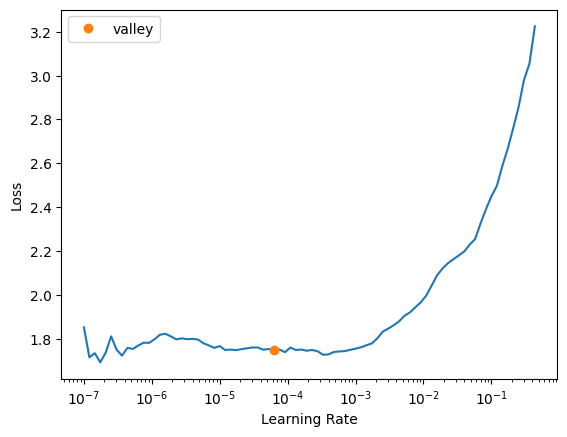

In [13]:
rate = learn.lr_find()
learn.fine_tune(1, base_lr=rate.valley)

epoch,train_loss,valid_loss,error_rate,time
0,1.711193,2.127500,0.713750,03:22


epoch,train_loss,valid_loss,error_rate,time
0,1.693673,2.113453,0.701667,08:33


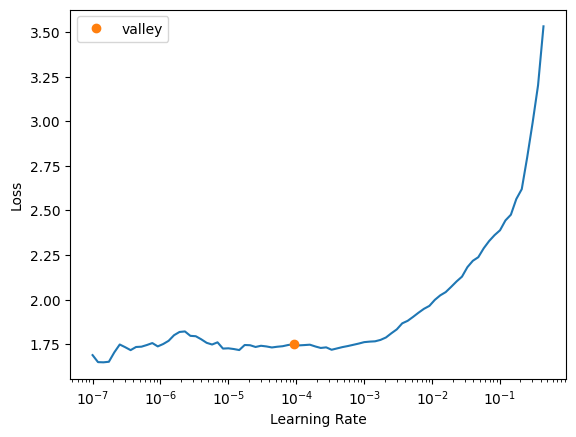

In [14]:
rate = learn.lr_find()
learn.fine_tune(1, base_lr=rate.valley)

epoch,train_loss,valid_loss,error_rate,time
0,1.633644,2.119752,0.705417,09:32


epoch,train_loss,valid_loss,error_rate,time
0,1.621054,2.117036,0.703750,08:06


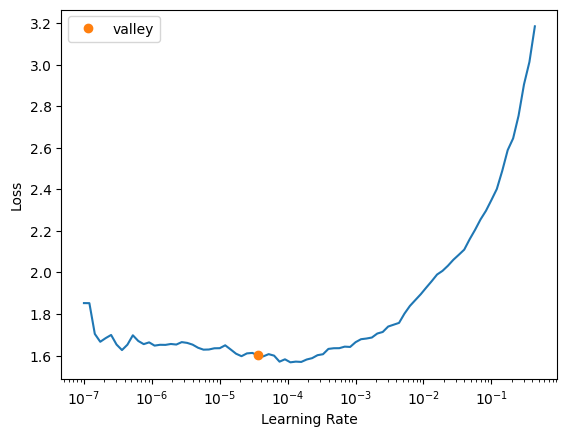

In [15]:
rate = learn.lr_find()
learn.fine_tune(1, base_lr=rate.valley)